# Unidirectional Configuration Plots

## Imports

In [1]:
# dependencies
import numpy as np
import os 
import sys

# qom modules
from qom.ui import init_log
from qom.ui.plotters import MPLPlotter

# add path to local libraries
sys.path.append(os.path.abspath(os.path.join('../..', 'sync_bi_uni')))
# import system
from systems.Uni00 import Uni00

# initialize logging
init_log()

MainThread               INFO    2021-07-14 21:50:19.763: (qom.ui.log) ------------------------------Logger Initialized-----------------


## Constants and Variables

In [2]:
# frequently used variables
file_path = 'H:/Workspace/data/uni_00'

# variables
deltas = np.around(np.linspace(0.0, 0.02, 101), 4).tolist()
etas = np.around(np.linspace(0.5, 1.0, 101), 3).tolist()
X, Y = np.meshgrid(deltas, etas)
file_suffix = '_1e4-20pi_52.0_1.0_0.005_0.75_[0.005, 0.005]_[0.005, 0.005]_[0.15, 0.15]_[0, 0]_1.0_delta_0.0_0.02_101_eta_0.5_1.0_101.npz'

## Phonon Number Difference

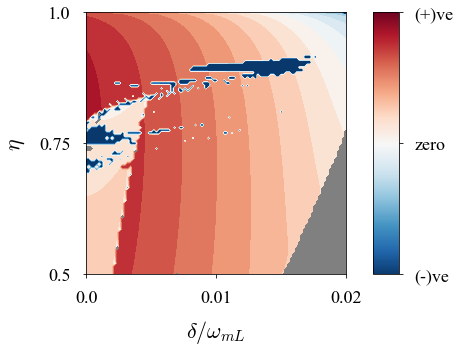

In [3]:
# get differences
n_b_diff = np.load(file_path + '/n_b_diff' + file_suffix)['arr_0'].tolist() 
n_b_diff_nan = [[n_b_diff[i][j] if np.abs(n_b_diff[i][j]) <= 500 else np.NaN for j in range(len(n_b_diff[i]))] for i in range(len(n_b_diff))]

# plotter
plotter = MPLPlotter({
    'X': deltas,
    'Y': etas
}, {
    'type': 'contourf',
    'palette': 'RdBu_r',
    'bins': 51,
    'x_label': '$\\delta / \\omega_{mL}$',
    'x_bound': 'both',
    'x_ticks': [0.0, 0.01, 0.02],
    'y_label': '$\\eta$',
    'y_bound': 'both',
    'y_ticks': [0.5, 0.75, 1.0],
    'show_cbar': True,
    'cbar_ticks': [-150.0, 0.0, 150],
    'cbar_tick_labels': ['(-)ve', 'zero', '(+)ve'],
    'cbar_position': 'right',
    'label_font_size': 22,
    'tick_font_size': 18
})
plotter.update(xs=X, ys=Y, vs=n_b_diff_nan)
plotter.show(True, 6.0, 5.0)

## Average Phase Synchronization

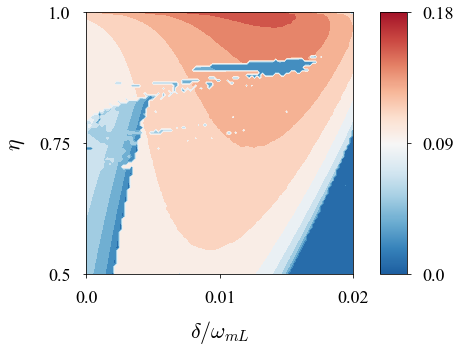

In [4]:
# get phase synchronization
S_phase_avg = np.load(file_path + '/S_phase_avg' + file_suffix)['arr_0']
S_phase_avg = [[S_phase_avg[i][j] if n_b_diff_nan[i][j] == n_b_diff_nan[i][j] else 0 for j in range(len(n_b_diff_nan[i]))] for i in range(len(n_b_diff_nan))]

# plotter
plotter = MPLPlotter({
    'X': deltas,
    'Y': etas
}, {
    'type': 'contourf',
    'palette': 'RdBu_r',
    'bins': 11,
    'x_label': '$\\delta / \\omega_{mL}$',
    'x_bound': 'both',
    'x_ticks': [0.0, 0.01, 0.02],
    'y_label': '$\\eta$',
    'y_bound': 'both',
    'y_ticks': [0.5, 0.75, 1.0],
    'cbar_title': '',
    'cbar_ticks': [0.00, 0.09, 0.18],
    'label_font_size': 22,
    'tick_font_size': 18
})
plotter.update(xs=X, ys=Y, vs=S_phase_avg)
plotter.show(True, 6.0, 5.0)

## Gaussian Quantum Discord

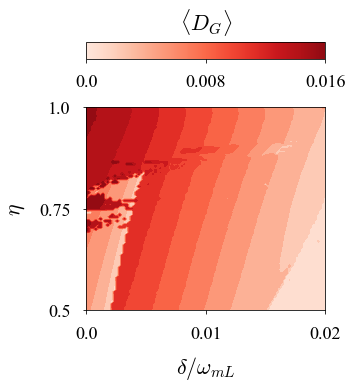

In [5]:
# get Gaussian discord
D_G_avg = np.load(file_path + '/D_Gaussian_avg' + file_suffix)['arr_0']
D_G_avg = [[D_G_avg[i][j] if n_b_diff_nan[i][j] == n_b_diff_nan[i][j] else 0 for j in range(len(n_b_diff_nan[i]))] for i in range(len(n_b_diff_nan))]

# plotter
plotter = MPLPlotter({
    'X': deltas,
    'Y': etas
}, {
    'type': 'contourf',
    'palette': 'Reds',
    'bins': 11,
    'x_label': '$\\delta / \\omega_{mL}$',
    'x_bound': 'both',
    'x_ticks': [0.0, 0.01, 0.02],
    'y_label': '$\\eta$',
    'y_bound': 'both',
    'y_ticks': [0.5, 0.75, 1.0],
    'cbar_title': '$\\langle D_{G} \\rangle$',
    'cbar_ticks': [0.0, 0.008, 0.016],
    'cbar_position': 'top',
    'label_font_size': 22,
    'tick_font_size': 18
})
plotter.update(xs=X, ys=Y, vs=D_G_avg)
plotter.show(True)

## Pearson Synchronization

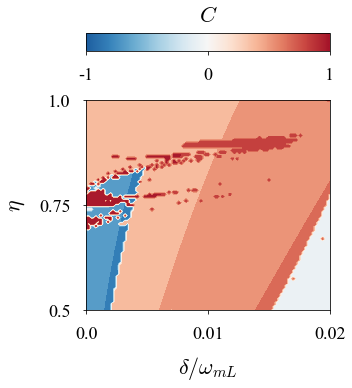

In [6]:
# get Pearson synchronization
S_Pearson = np.load(file_path + '/S_Pearson' + file_suffix)['arr_0']
S_Pearson = [[S_Pearson[i][j] if n_b_diff_nan[i][j] == n_b_diff_nan[i][j] else 0 for j in range(len(n_b_diff_nan[i]))] for i in range(len(n_b_diff_nan))]

# plotter
plotter = MPLPlotter({
    'X': deltas,
    'Y': etas
}, {
    'type': 'contourf',
    'palette': 'RdBu_r',
    'bins': 11,
    'x_label': '$\\delta / \\omega_{mL}$',
    'x_bound': 'both',
    'x_ticks': [0.0, 0.01, 0.02],
    'y_label': '$\\eta$',
    'y_bound': 'both',
    'y_ticks': [0.5, 0.75, 1.0],
    'cbar_title': '$C$',
    'cbar_ticks': [-1, 0, 1],
    'cbar_position': 'top',
    'label_font_size': 22,
    'tick_font_size': 18
})
plotter.update(xs=X, ys=Y, vs=S_Pearson)
plotter.show(True)